# Practical 1: MLP Classifier on MNIST

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
X = X / 255.
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

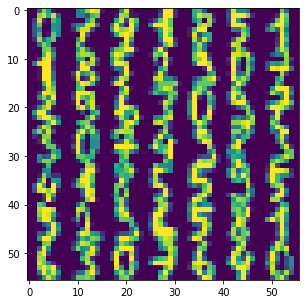

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
X_to_plot = X[:49, :]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(8*7, 8),
                  X_to_plot[ 7:14, ...].reshape(8*7, 8),
                  X_to_plot[14:21, ...].reshape(8*7, 8),
                  X_to_plot[21:28, ...].reshape(8*7, 8),
                  X_to_plot[28:35, ...].reshape(8*7, 8),
                  X_to_plot[35:42, ...].reshape(8*7, 8),
                  X_to_plot[42:49, ...].reshape(8*7, 8)]
ax.imshow(X_to_plot)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xffffff)

In [6]:
model = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.002,
#     power_t=0.5,
    max_iter=2000,
    shuffle=True,
#     warm_start=False,
#     momentum=0.9,
#     nesterovs_momentum=True,
#     early_stopping=True,
#     tol=1e-5,
#     n_iter_no_change=5,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-12,
#     verbose=True,
    random_state=42
)

In [7]:
model.fit(X_train, y_train)

MLPClassifier(alpha=0.01, epsilon=1e-12, hidden_layer_sizes=(16, 16),
              learning_rate_init=0.002, max_iter=2000, random_state=42)

In [8]:
y_preds = np.argmax(model.predict(X_test), axis=1)
y_actual = np.argmax(y_test, axis=1)

In [9]:
print(classification_report(y_preds, y_actual))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.95      0.98      0.97        43
           2       0.94      0.94      0.94        34
           3       0.91      0.94      0.92        32
           4       1.00      0.90      0.95        40
           5       0.97      0.94      0.96        34
           6       0.94      0.94      0.94        33
           7       0.97      0.97      0.97        37
           8       0.88      1.00      0.94        29
           9       0.90      0.97      0.94        37

    accuracy                           0.93       360
   macro avg       0.93      0.94      0.93       360
weighted avg       0.93      0.93      0.93       360



In [10]:
accuracy_score(y_preds, y_actual)

0.9333333333333333